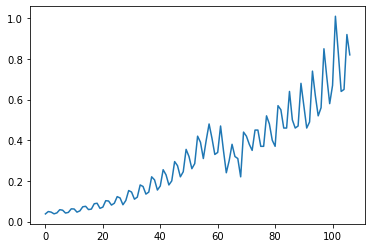

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



datos = pd.read_csv('coca.csv', sep=";",decimal=",")
y = datos.iloc[:,1]

plt.plot(y)
plt.show()
num_lags=45

In [2]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=20) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 4
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: 1.3490910100975013
p-value: 0.9968701406695682
Regular differences:  1
Seasonal differences: 1


                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 197.680
Date:                           Sat, 23 Oct 2021   AIC                           -387.359
Time:                                   19:32:30   BIC                           -376.859
Sample:                                        0   HQIC                          -383.107
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6445      0.082      7.857      0.000       0.484       0.805
ma.L1         -0.9594      0.052    -18.316

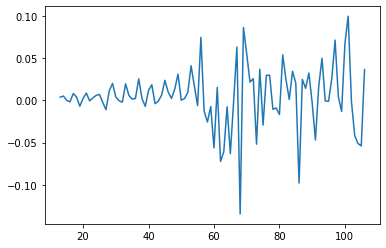

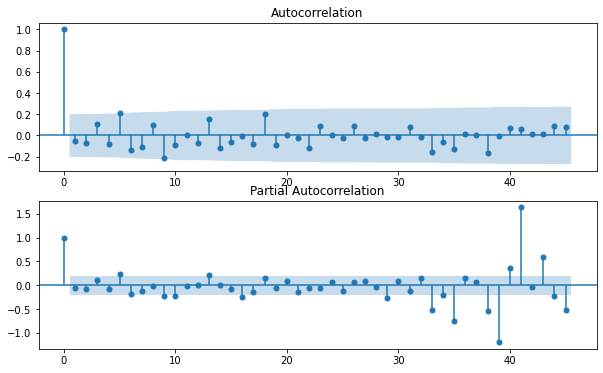

In [28]:
s = 4

fit = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (0,1,1,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=45


# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.


plt.plot(residuos)
plt.show()
fig, ax = plt.subplots(2,1, figsize = (10,6))
plot_acf(residuos, lags = nlags, ax=ax[0])
plot_pacf(residuos, lags = nlags, method="ols", ax=ax[1])
plt.show()


In [23]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Ljung-Box: Statistic value [31.37644568] p-value [0.68814479]
Shapido: Statistic value 0.9396136403083801 p-value 0.0002930311602540314


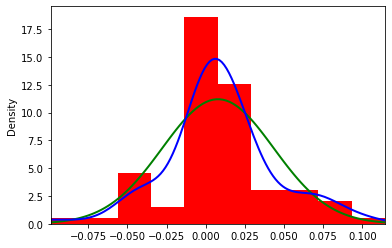

In [24]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[36])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

In [25]:
def criteria(y):
    '''
    1.	A stochastic process is covariance stationary (or weak stationary) if
        a.	E(Yt) = µ, for all t
        b.	Var(Yt) = σy2, for all t
        c.	Cov(Yt,Yt-h) = ϒ(h), for all t and h
        TEST: adf_test
    2.	A process is white noise if it is
        a.	Covariance Stationary
        b.	Uncorrelated
        c.	Zero mean
    3.	A process is strict white noise if it is
        a.	Covariance Stationary
        b.	Zero mean
        c.	Independent and identically distributed (iid)
            TEST: LjungBox box_test

    4.	A process is Gaussian white noise if is a WN normally distributed
        Note that under normality, a WN is a SWN because uncorrelated variables are independent when their multivariate distribution is normal
        TEST:Saphiro
    
    '''
    import matplotlib.pyplot as plt
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    plt.plot(y)
    plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags)
    plt.show()
    
    from scipy.stats import kurtosis, skew

    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kurtosis = kurtosis(y)
    skewness = skew(y)
   

    #from pmdarima.arima.utils import ndiffs, nsdiffs
    import statsmodels as sm

    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)

    adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
    
    from scipy.stats import shapiro
    # Normality test
    saphiro = shapiro(y)

    import statsmodels.api as sm
    box_test = sm.stats.acorr_ljungbox(y, lags=[20])

    print("\033[1m"+"Step 1: STATIONARY "+'\033[0m')
    print('--'*10)
    print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
    print('\n')
    if adf_test[1]<0.05:
        print("The process is stationary, and NO transformation is needed.")
    else:
        print("The process is not stationary, and it needs transformation.")
        
    print('\n')
    print("\033[1m"+"Step 2: Normal Distribution"+'\033[0m')
    print('--'*10)
    import seaborn as sns
    import scipy.stats as st

    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)

    plt.show()


    print("Saphiro",saphiro)
    print('\n')
    if saphiro.pvalue>0.05:
        print("It is NORMALLY distributed")
    else:
        print("It is NOT normally distirbuted.")
    
    print('\n')
    print("\033[1m"+"Step 3: White Noise: zero mean, constant variance, acf/pacf is zero"+'\033[0m')
    print('--'*10)
    print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)
    if abs(mean)<0.1:
        print('The mean is nearly zero.')
    
    print('\n')
    print("\033[1m"+"Step 4: Linear Model"+'\033[0m')
    print('--'*10)
    print("LjungBox", box_test)
    print('\n')
    if box_test[1]>0.05:
        print("Data is independently distributed, therefore NO linear model is needed.")
        print('\n')
    else:
        print("Data is not independenlty distrubuted, linear model is needed.")
        print('\n')

def nonlinear(y):
    print("\033[1m"+"Step 5: If WN check Non-Linear Model"+'\033[0m')
    print('--'*10)
    plt.plot(y**2)
    plt.show()
    plot_acf(y**2,lags=num_lags)
    plt.show()
    plot_pacf(y**2,lags=num_lags)
    plt.show()

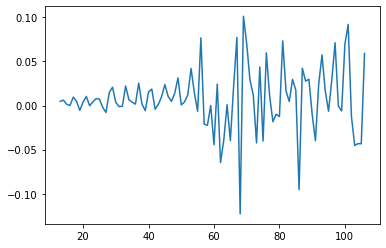

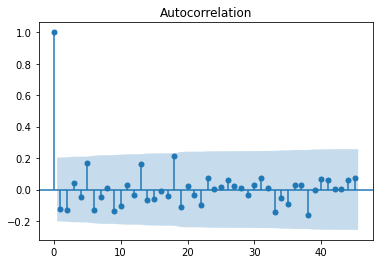

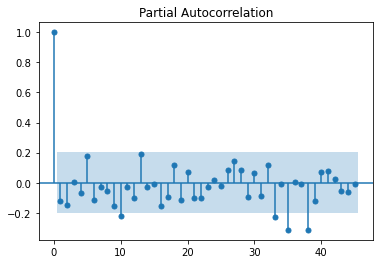

/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (-10.69053161646917, 3.736052668333992e-19, 0, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, -305.3804689581616)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


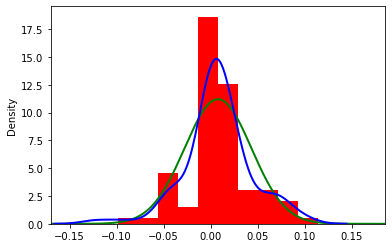

Saphiro ShapiroResult(statistic=0.9396136403083801, pvalue=0.0002930311602540314)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.007843569933186557 Standard deviation 0.035606366071289995 Skewness -0.29673420798596045 Kurtosis 1.9792938565262137
The mean is nearly zero.


Step 4: Linear Model
--------------------
LjungBox (array([22.66907277]), array([0.30533436]))


Data is independently distributed, therefore NO linear model is needed.




In [26]:
criteria(residuos)

Step 5: If WN check Non-Linear Model
--------------------


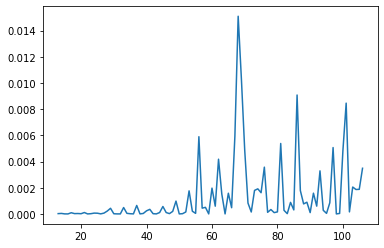

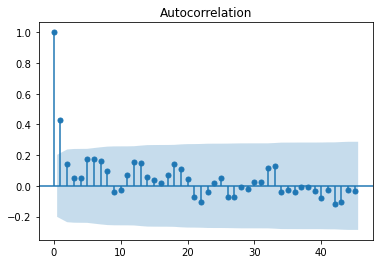

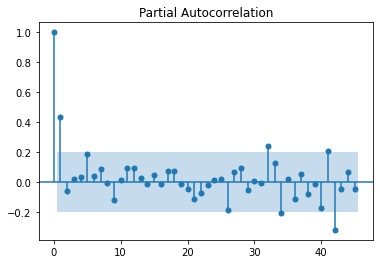

In [27]:
nonlinear(residuos)

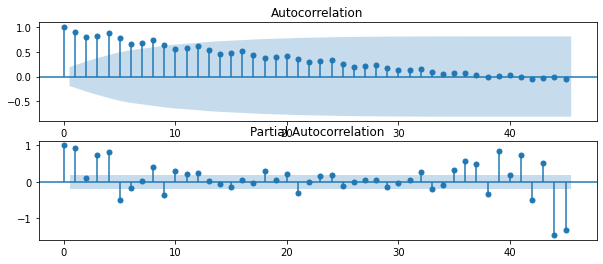

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 45 # play with this parameter

# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.

fig, ax = plt.subplots(2,1, figsize = (10,4))
z = y.diff().dropna()
zz=z.diff().dropna()
plot_acf(y, lags = nlags, ax=ax[0])
plot_pacf(y, lags = nlags, method="ols", ax=ax[1])
plt.show()


In [9]:
#pip install pmdarima
#pip install git+https://github.com/alkaline-ml/pmdarima.git

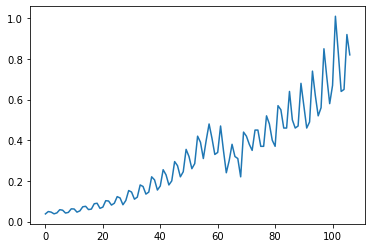

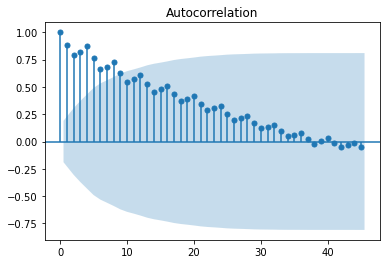

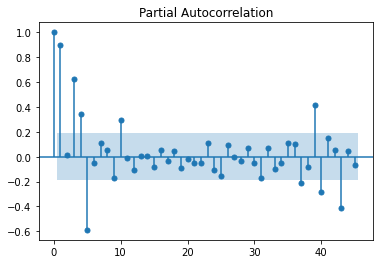

/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (1.0592123446677113, 0.9948530334564033, 10, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, -365.4361346799874)


The process is not stationary, and it needs transformation.


Step 2: Normal Distribution
--------------------


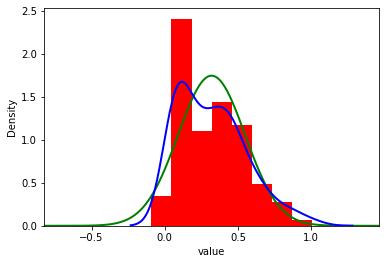

Saphiro ShapiroResult(statistic=0.9288385510444641, pvalue=2.3629010684089735e-05)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.3191794392523365 Standard deviation 0.22845663763215596 Skewness 0.7238203534593551 Kurtosis -0.06791027827439189


Step 4: Linear Model
--------------------
LjungBox (array([930.82998218]), array([2.14832331e-184]))


Data is not independenlty distrubuted, linear model is needed.




In [10]:
criteria(y)

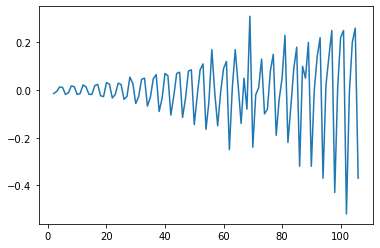

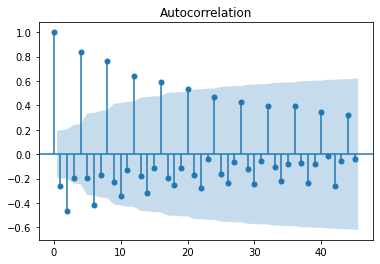

/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


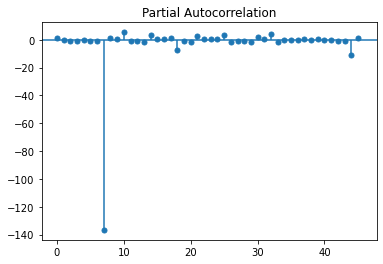

/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (-7.158009571786957, 3.01909312230757e-10, 6, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -345.6527332221374)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


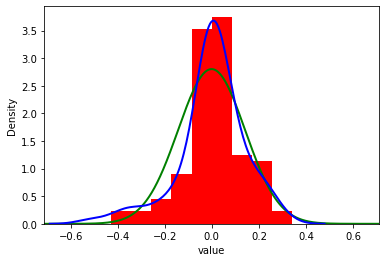

Saphiro ShapiroResult(statistic=0.9268914461135864, pvalue=2.1616586309392005e-05)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean -0.0010638095238095246 Standard deviation 0.14237842675256374 Skewness -0.9318409347119168 Kurtosis 1.9970473543671892
The mean is nearly zero.


Step 4: Linear Model
--------------------
LjungBox (array([394.98982369]), array([2.23582205e-71]))


Data is not independenlty distrubuted, linear model is needed.




In [11]:
z = y.diff().dropna()
zz = z.diff().dropna()
criteria(zz)

Step 5: If WN check Non-Linear Model
--------------------


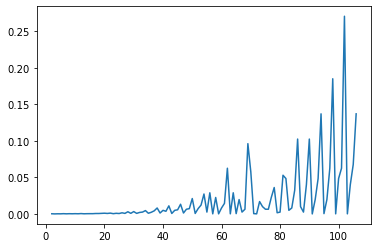

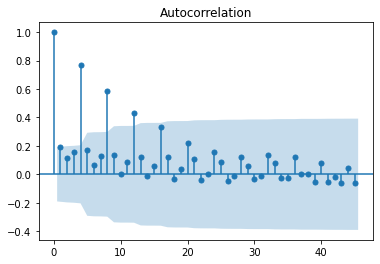

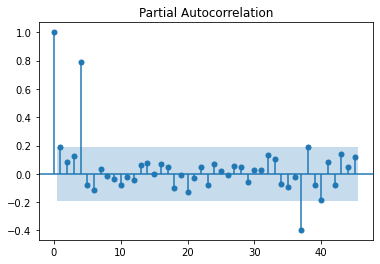

In [12]:
nonlinear(zz)

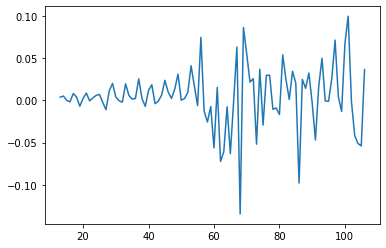

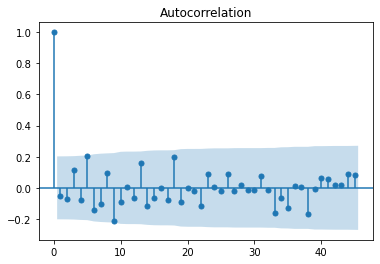

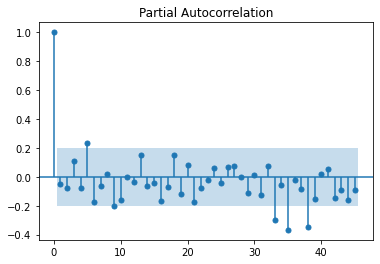

/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
/Users/MenaL/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Step 1: STATIONARY 
--------------------
adf_test (-10.014595392413616, 1.742328416728474e-17, 0, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, -304.3358071219195)


The process is stationary, and NO transformation is needed.


Step 2: Normal Distribution
--------------------


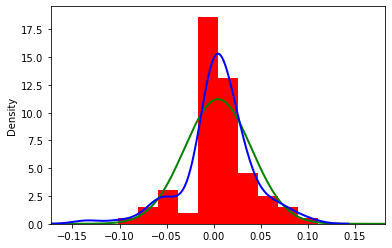

Saphiro ShapiroResult(statistic=0.9236570000648499, pvalue=3.8048994611017406e-05)


It is NOT normally distirbuted.


Step 3: White Noise: zero mean, constant variance, acf/pacf is zero
--------------------
Mean 0.004590691705568106 Standard deviation 0.03557515804595163 Skewness -0.6626886736211964 Kurtosis 2.593036942450941
The mean is nearly zero.


Step 4: Linear Model
--------------------
LjungBox (array([28.65234146]), array([0.09483397]))


Data is independently distributed, therefore NO linear model is needed.




In [13]:
criteria(residuos)

Step 5: If WN check Non-Linear Model
--------------------


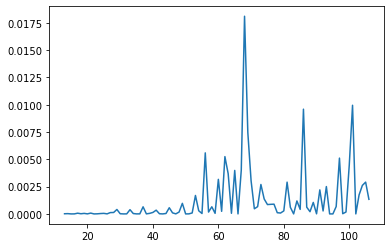

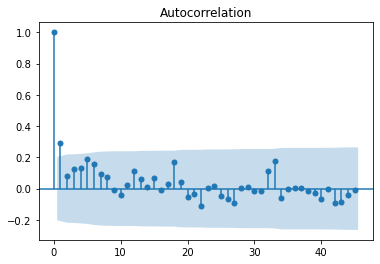

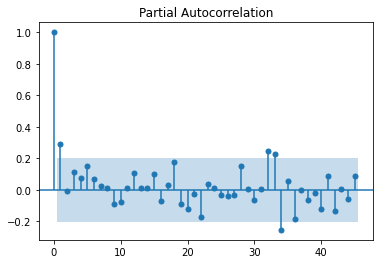

In [14]:
nonlinear(residuos)

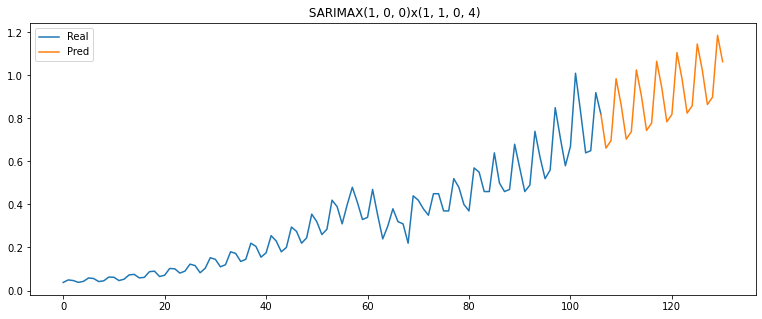

In [15]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 24)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)

plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.title(" SARIMAX(1, 0, 0)x(1, 1, 0, 4)")
plt.legend()
plt.show()

In [16]:
fit = SARIMAX(endog = y, order = (1,0,0), seasonal_order = (1,1,0,s)).fit()
print(fit.summary())
y_pred = fit.forecast(steps = 24)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 198.799
Date:                           Sat, 23 Oct 2021   AIC                           -391.597
Time:                                   19:18:47   BIC                           -383.693
Sample:                                        0   HQIC                          -388.396
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8255      0.063     13.041      0.000       0.701       0.950
ar.S.L4       -0.4360      0.105     -4.153

In [17]:
fit_1 = SARIMAX(endog = y, order = (1,1,1), seasonal_order = (0,1,1,s)).fit()
print(fit_1.summary())
y_pred_1 = fit_1.forecast(steps = 24)

# Ponemos el último índice real
y_pred_1.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred_1 = y_pred_1.reset_index().sort_values(by = 'index').set_index('index')

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 197.680
Date:                           Sat, 23 Oct 2021   AIC                           -387.359
Time:                                   19:18:47   BIC                           -376.859
Sample:                                        0   HQIC                          -383.107
                                           - 107                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6445      0.082      7.857      0.000       0.484       0.805
ma.L1         -0.9594      0.052    -18.316

In [18]:
import statistics
statistics.variance (y_pred_1.predicted_mean)

0.02185529204556485

In [19]:
statistics.variance(y_pred.predicted_mean)

0.016119808271003195

In [20]:
y_pred

,predicted_mean
index,
106,0.820000
107,0.648777
108,0.687561
109,0.983049
110,0.844016
111,0.661177
112,0.684581
113,0.966619
114,0.842675
